# Decision Models II

- Please work in groups of two or more and **help your group members**.

- Commit and show an instructor your work before leaving.

In [107]:
# Run this cell first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tools import *

### Review

In the previous lab, we introduced a class of decisions that people frequently make called decisions under risk.

In particular, we were concerned with choices between gambles with uncertain outcomes often employed in psychology experiments, such as the below:

| Gamble A | Gamble B |
|-|-|
| <span style="color:blue">50%</span> chance of <span style="color:green">\$1,000</span> <br> <span style="color:blue">50%</span> chance of <span style="color:green">\$0</span> | <span style="color:blue">100%</span> chance of <span style="color:green">\$500</span> |

Recall that we can represent these pairs of options using numpy arrays.

**Warm-up:** Fill in the blanks below.

In [108]:
A_outcomes = np.array([1000., 0.])
A_probs = np.array([0.5, 0.5])

B_outcomes = np.array([500])
B_probs = np.array([1.])

In [109]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if (A_outcomes[0], B_outcomes[0]) == (1000., 500.):
    print('Test passed')
else:
    print('Test failed')

Test passed


One rational strategy we discussed for making such decisions involves picking the gamble with the highest expected value (average payout): $$V(A) = \sum_{x_i\in A} x_i p_i,$$ where each pair $(x_i, p_i)$ is an outcome and its probability from gamble A.

We implemented the computation of expected value as:

In [110]:
def compute_expected_value(outcomes, probs):
    return np.sum(outcomes * probs)

**Warm-up:** Compute the expected values of the gambles above and store the results in `EV_A` and `EV_B`.

In [111]:
# Your code here
EV_A = compute_expected_value(A_outcomes, A_probs)
EV_B = compute_expected_value(B_outcomes, B_probs)


# do not change
print("Expected value of A:", EV_A, "(1000 * 0.5)")
print("Expected value of B:", EV_B)

Expected value of A: 500.0 (1000 * 0.5)
Expected value of B: 500.0


The expected values of both gambles above is <span>$500</span>. As we discussed previously, a decision model that valuates gambles based on expected value would thus be indifferent (have no preference).

In contrast to this prediction, most people actually do have a preference: they choose gamble B more often than they choose gamble A.

To explain this preference, we introduced the idea of utility functions to represent the psychological value of money. We modeled the psychological "utility" of money as a power function $u(x) = x^\alpha$, where $0 < \alpha < 1$. This function is monotonic with money, but **concave** (i.e., curves downwards).

A visualization of the function is loaded below.

The fact that this curve rises more from 0 to 500 than it does from 500 to 1000 explains why people seem to treat "half of 1000" as being less than 500.

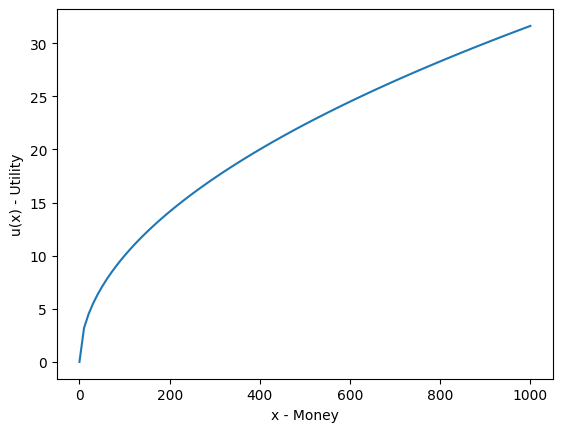

In [112]:
plot_utility_curve()

We then revised the valuation of a gamble to include this utility function, called expected utility:

$$V(A) = \sum_{x_i\in A} u(x_i) p_i.$$

**Warm-up:** Compute the expected utilities of the gambles above and store the results in `EU_A` and `EU_B`.

In [113]:
# Your code here

def power_function(x, alpha):
    return x ** alpha

A2_utils = power_function(1000, alpha=0.8)
B2_utils = power_function(500, alpha=0.8)

EU_A = compute_expected_value(A2_utils, A_probs)*A_probs[0]
EU_B = compute_expected_value(B2_utils, B_probs)


# do not change
print("Expected utility of A:", EU_A)
print("Expected utility of B:", EU_B)

Expected utility of A: 125.59432157547904
Expected utility of B: 144.2699905907214


Because the expected utility of B is higher than A, **this model explains why people choose B**.

### Decisions involving losses

In the last lab, we briefly introduced the following choice problem for which expected utility fails to predict human choice:

| Gamble A | Gamble B |
|-|-|
| <span style="color:blue">50%</span> chance of <span style="color:green">-\$100</span> <br> <span style="color:blue">50%</span> chance of <span style="color:green">\$100</span> | <span style="color:blue">100%</span> chance of <span style="color:green">\$0</span> |

Recall that the negative outcomes here are losses of money. We extended our utility function to handle such losses by assuming that the utility of a loss (called **disutility**) is just the opposite of the utility of a gain by the same amount of money. That is, if we assume $x$ is positive, then $$u(-x) = -u(x).$$

Because the manitudes of gains and losses are proportional to each other under this utility function, we say that the function is **symmetric**.

Both the expected values and the expected utilities of both gambles are 0. This is obvious for gamble B. The reason it's also true for A is that the average of -100 and 100 is 0. Further, because utility is symmetric, the utilities of -100 and 100 will always cancel out and thus also always be 0. The prediction of both models is thus that people will be indifferent.

In contrast to these predictions, most people actually do have a preference: they choose gamble B more often than they choose gamble A.

### Modeling loss aversion

Kahneman and Tversky (1979), who we discussed in the last lab, proposed that people avoid gamble A because they are particularly averse to losses.

For example, people may feel **twice** as upset about a loss of <span>\$10</span> than they feel good about a gain of <span>\$10</span>.

We can write out this expectation formally as $u(-x) = 2 \times -u(x)$. 

Any utility function of this form, namely where $u(-x) \neq -u(x)$, is called an **asymmetric** utility function.

More generally, we say that losses may be exaggerated (overweighted) relative to gains by a factor of $\lambda$:

$$u(-x) = -\lambda u(x).$$

**Exercise:** Create an asymmetric power utility function called `power_utility_asym` that takes an array of outcomes `x`, and $\alpha$ and $\lambda$ as named arguments with defaults 0.8 and 1, and returns an array of utilities.

In [114]:
def power_utility_asym(x, alpha=0.8, lambda_=1):

    # Your code here
    x = np.array(x)
    utility = np.where(x >= 0, x**alpha, -lambda_ * (-x)**alpha)
    return utility

In [115]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if power_utility_asym(np.array([-1000.0]))[0] == -(1000**0.8):
    print('Test passed')
else:
    print('Test failed')

Test passed


/tmp/ipykernel_70397/2157995683.py:5: RuntimeWarning: invalid value encountered in power
  utility = np.where(x >= 0, x**alpha, -lambda_ * (-x)**alpha)


We can visualize this utility function below using three different values of $\lambda$.

Notice that:
- When $\lambda = 1$, the function is symmetric, and $|u(x)| = |u(-x)|$

- When $\lambda = 0.5$, $|u(x)| > |u(-x)|$, or gains are exaggerated

- When $\lambda = 2$, $|u(x)| < |u(-x)|$, or losses are exaggerated

/tmp/ipykernel_70397/2157995683.py:5: RuntimeWarning: invalid value encountered in power
  utility = np.where(x >= 0, x**alpha, -lambda_ * (-x)**alpha)


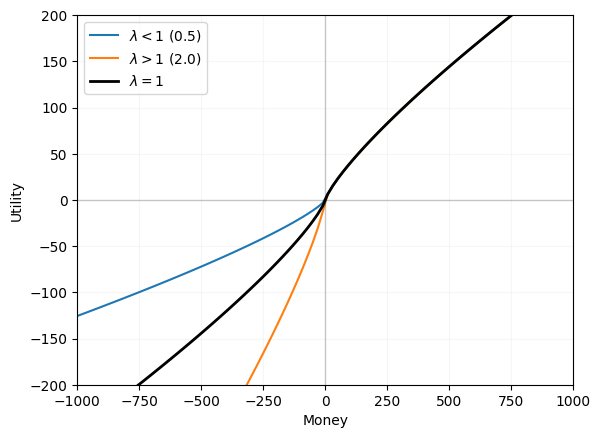

In [116]:
plot_asym_utility(power_utility_asym)

Let's see what the result is of applying this function.

First let's represent this choice problem with arrays.

**Exercise:** Fill in the blanks:

In [117]:
A2_outcomes = np.array([-100., 100.])
A2_probs = np.array([0.5, 0.5])

B2_outcomes = np.array([0])
B2_probs = np.array([1.])

In [118]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if (A2_outcomes[0], B2_outcomes[0]) == (-100., 0.):
    print('Test passed')
else:
    print('Test failed')

Test passed


For the sake of comparison, let's compute the expected values of each gamble.

**Exercise:** Compute the expected values of each gamble and store them in variables named `EV_A2` and `EV_B2`.

In [119]:
# Your code here
EV_A2 = compute_expected_value(A2_outcomes, A2_probs)
EV_B2 = compute_expected_value(B2_outcomes, B2_probs)


# do not change
print("Expected value of A:", EV_A2)
print("Expected value of B:", EV_B2)

Expected value of A: 0.0
Expected value of B: 0.0


In [120]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if EV_A2 == EV_B2 == 0:
    print('Test passed')
else:
    print('Test failed')

Test passed


Both are zero as expected.

Let's also compare expected utility using symmetric utility.

**Exercise:** Set $\alpha=0.8$. Store the expected utilities in variables named `EU_A2` and `EU_B2`.

In [121]:
# Your code here
def power_utility(x, alpha=0.8):
    return np.sign(x) * (np.abs(x) ** alpha)

EU_A2 = np.sum(power_utility(A2_outcomes, alpha=0.8) * A2_probs[0])
EU_B2 = np.sum(power_utility(B2_outcomes, alpha=0.8) * B2_probs)


# do not change
print("Expected utility of A:", EU_A2)
print("Expected utility of B:", EU_B2)

Expected utility of A: 0.0
Expected utility of B: 0.0


In [122]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if EU_A2 == EU_B2 == 0:
    print('Test passed')
else:
    print('Test failed')

Test passed


Both are zero as expected.

Now let's try a utility function that overweights losses relative to gains.

**Exercise:** Set $\alpha=0.8$. Choose the value of $\lambda$ from one of the three values in the visualization above. Store the expected utilities in variables named `EU2_A2` and `EU2_B2`.

In [123]:
# Your code here
EU2_A2 = np.sum(power_utility_asym(A2_outcomes, alpha=0.8, lambda_=2) * A2_probs)
EU2_B2 = np.sum(power_utility_asym(B2_outcomes, alpha=0.8, lambda_=2) * B2_probs)


# do not change
print("Expected utility of A:", EU2_A2)
print("Expected utility of B:", EU2_B2)

Expected utility of A: -19.905358527674867
Expected utility of B: 0.0


/tmp/ipykernel_70397/2157995683.py:5: RuntimeWarning: invalid value encountered in power
  utility = np.where(x >= 0, x**alpha, -lambda_ * (-x)**alpha)


In [124]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if EU2_A2 == -19.905358527674867:
    print('Test passed')
else:
    print('Test failed')

Test passed


The expected utility of gamble A is now negative, and lower than that of gamble B. This implies a preference for B, which correctly predicts human behavior!

Why does this work? Let's look at the utilities of gamble A to answer this.

In [125]:
power_utility_asym(A2_outcomes, alpha=0.8, lambda_=2)

/tmp/ipykernel_70397/2157995683.py:5: RuntimeWarning: invalid value encountered in power
  utility = np.where(x >= 0, x**alpha, -lambda_ * (-x)**alpha)


array([-79.62143411,  39.81071706])

The utility one would lose (~80) by a loss of <span>$100</span> is twice the utility one would gain (~40) by a gain of <span>$100</span>.

Thus, the average is pulled into the negative, and the gamble becomes much less appealing.

### From psychological money to psychological probability

All of our previous examples so far have demonstrated the same thing in different ways, namely that the psychological value of money is not the same as the objective (true) value of money. It turns out that the same can be true for probability values as well.

Consider the following choice problem:

| Gamble A | Gamble B |
|-|-|
| <span style="color:white">0</span><span style="color:blue">1%</span> chance of <span style="color:green">\$500</span> <br> <span style="color:blue">99%</span> chance of <span style="color:green">\$0</span> | <span style="color:blue">100%</span> chance of <span style="color:green">\$5</span> |

**Most people choose gamble A**, taking a very small chance of winning <span>$500</span> over the sure win of <span>$5</span>.

**Exercise:** Discuss with your partners which you would choose and why. Can you think of a good argument?

Let's see what's predicted by decision models based on expected value and expected utility.

Below are the arrays for the choice problem.

**Exercise:** Fill in the blanks.

In [126]:
A3_outcomes = np.array([500., 0.])
A3_probs = np.array([0.01, 0.99])

B3_outcomes = np.array([5])
B3_probs = np.array([1.])

In [127]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if A3_outcomes[0] == 500. and A3_probs[1] == 1 - 0.01 and B3_outcomes[0] == 5. and B3_probs[0] == 1.0:
    print('Test passed')
else:
    print('Test failed')

Test passed


Let's first look at the expected values of the gambles.

**Exercise:** Compute the expected values of both gambles. Store them in variables `EV_A3` and `EV_B3`.

In [128]:
# Your code here
EV_A3 = compute_expected_value(A3_outcomes, A3_probs)
EV_B3 = compute_expected_value(B3_outcomes, B3_probs)


# do not change
print("Expected value of A:", EV_A3)
print("Expected value of B:", EV_B3)

Expected value of A: 5.0
Expected value of B: 5.0


In [129]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if EV_A3 == EV_B3:
    print('Test passed')
else:
    print('Test failed')

Test passed


The expected value both gambles is exactly <span>$5</span>, since $0.01 \times 500 = 1.0 \times 5$, implying that a decision maker would be indifferent (i.e., have no preference).

Thus, a decision model based on expected value makes the wrong prediction.

Now, let's look at what a decision model based on *expected utility* would predict.

**Exercise:** Compute the expected utilities of both gambles. Store them in variables `EU_A3` and `EU_B3`.

In [130]:
# Your code here
def power_utility(x, alpha=0.8):
    return np.sign(x) * (np.abs(x) ** alpha)

EU_A3 = np.sum(power_utility(A3_outcomes, alpha=0.8) * A3_probs)
EU_B3 = np.sum(power_utility(B3_outcomes, alpha=0.8) * B3_probs)


# do not change
print("Expected utility of A:", EU_A3)
print("Expected utility of B:", EU_B3)

Expected utility of A: 1.4426999059072139
Expected utility of B: 3.623898318388478


In [131]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(EU_A3, 1.4426999059072139) and np.isclose(EU_B3, 3.623898318388478):
    print('Test passed')
else:
    print('Test failed')

Test passed


Unlike the previous model, this model is not indifferent. Instead, it *predicts that people will choose gamble B*.

As we already know, this preference is a result of the utility function that models the diminishing marginal utility of money. That is, not all <span>$5</span> chunks of the <span>$500</span> outcome have the same utility (i.g., each has successively less). The ultimate result is that $u(\$500) / 100 < u(\$5)$.

While this is a useful exercise, it doesn't help us explain which gamble humans choose for this choice problem. In fact, it **predicts the opposite!** So now we're even "more wrong" in some sense.

Why is this the case? The reason for this has perhaps less to do with money and more to do with the probabilities involved.

### "So you're telling me there's a chance?"

Let's analyze the choice problem again:

| Gamble A | Gamble B |
|-|-|
| <span style="color:white">0</span><span style="color:blue">1%</span> chance of <span style="color:green">\$500</span> <br> <span style="color:blue">99%</span> chance of <span style="color:green">\$0</span> | <span style="color:blue">100%</span> chance of <span style="color:green">\$5</span> |

As we saw, the expected values of both gambles are the same, and the expected utility of gamble B is higher. Nonetheless, people are still choosing gamble A. Thus, there must be something pulling people towards gamble A.

**Exercise:** Discuss with your group why you think people are drawn to gamble A.

Were we starting from scratch, we might suspect that the big <span>$500</span> number is getting upweighted somehow. That is, maybe when a number gets big and appealing enough, it becomes even more valuable. However, this sounds a bit like the opposite of what our current utility function implies: we expect *decreasing* marginal utility, not *increasing* marginal utility. Is there another explanation that's compatible with our current conceptualization of utility?

The only other numbers that could matter are the probabilities. Does the mind treat these quantities objectively? Certainly people know that 0% means impossible and 100% means guaranteed, but what about everything in between? It wouldn't be unexpected if people were overly hopeful at winning the <span>$500</span>. After all, lots of people pay money to play the state lottery despite an almost zero chance of winning. Psychologically, anything greater than 0% feels like "there's a chance". On the other end of the scale, people may be more pessimistic about a number like 80% than they should be: "it's not certain".

Kahneman and Tversky (1979) also proposed that people **overestimate** the likelihood of **rare events**, and **underestimate** the likelihood of **common events**.

Just like our utility function, the mapping from objective probabilities to psychological estimates of likelihood can be described by a **probability weighting function**.

Kahneman and Tversky propose one common form for such a function:

$$\pi(p) = \frac{p^γ}{(p^γ + (1-p)^γ)^{1/γ}},$$

where $p$ is an objective probability value, $\pi(p)$ is the probability transformed into a psychological quantity, and $\gamma$ is a parameter that determines the shape of the probability weighting function. Note that the function is only defined when $\gamma > 0$. The outputs of this function are often called **decision weights**.

Let's begin to think about how this function works with an exercise.

**Exercise:** What does $\pi(p)$ reduce to when $\gamma = 1$? Set the variable `answer` to an integer between 1 and 4.

1. $\pi(p) = \gamma$
2. $\pi(p) = p$
3. $\pi(p) = p^γ + (1-p)^γ$
4. $\pi(p) = 1$


In [132]:
# Pick from options above
answer = 2 # 1, 2, 3, or 4

In [133]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if int('00B2', 16) // 89 == answer:
    print('Test passed')
else:
    print('Test failed')

Test passed


When $\gamma = 1$, the probability weighting function is the identity function, or the line ($y=x$). That also means that when $\gamma = 1$, we expect that people perceive the probability values objectively.

To understand what happens when $\gamma \neq 1$, let's implement the function.

**Exercise:** Create a function called `pi` that takes an array of probabilities `p` and $\gamma$ as a named argument defaulted to 1, and returns an array of weights.

In [134]:
def pi(p, gamma=1):
    
    # Your code here
    p_gamma = np.pow(p, gamma)
    return np.float128(p_gamma) / np.pow(p_gamma + np.pow((1 - p),gamma),1./gamma)

In [135]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if pi(0.5, gamma=1) == 0.5:
    print('Test passed')
else:
    print('Test failed')

Test passed


Let's verify that this function works how we expect.

**Exercise:** Transform the probabilities associated with gamble A (i.e., in `A3_probs`) using a $\gamma$ value of 1. Store the result in an array called `A4_weights_when_gamma_is_1`.

In [136]:
# Your code here
A4_weights_when_gamma_is_1 = pi(A3_probs, gamma=1)


# do not change
print("Transformed Gamble A probabilities:", A4_weights_when_gamma_is_1)

Transformed Gamble A probabilities: [0.01 0.99]


In [137]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if A4_weights_when_gamma_is_1[0] == 0.01 and A4_weights_when_gamma_is_1[1] == 0.99:
    print('Test passed')
else:
    print('Test failed')

Test passed


As we expected, the above simply returned the original probabilities unchanged.

Now let's try the same thing when $\gamma < 1$.

**Exercise:** Transform the probabilities associated with gamble A (i.e., in `A3_probs`) using a $\gamma$ value of 0.7. Store the result in an array called `A4_weights_when_gamma_islessthan_1`.

In [138]:
# Your code here
A4_weights_when_gamma_islessthan_1 = pi(A3_probs, gamma=0.7)


# do not change
print("Transformed Gamble A probabilities:", A4_weights_when_gamma_islessthan_1)

Transformed Gamble A probabilities: [0.0380169  0.94824672]


In [148]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if A4_weights_when_gamma_islessthan_1[0] == 0.0380169 and A4_weights_when_gamma_islessthan_1[1] == 0.94824672:
    print('Test passed')
else:
    print('Test failed')

Test failed


When we look at the transformations from original to psychological probabilities, we see:
- 0.01 → ~0.04
- 0.99 → ~0.95.

That is, the small probability got larger, and the large probability got smaller.

This is exactly the behavior we want to model: we said we wanted to model the overestimation of rare events and the underestimation of common ones.

Let's see what what the function looks like for all probabilities when $\gamma=0.7$:

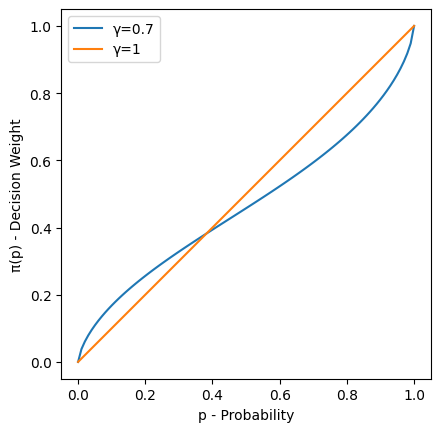

In [140]:
plot_pw_curve(gamma=0.7), plot_pw_curve(gamma=1)
plt.axis('square'); plt.legend();

The shape of the blue line is called an **inverse S-shaped function**. You can see that, compared the orange line (i.e., unchanged probabilties), $\pi$ overweights small probabilities and underweights large probabilities in a smooth fashion.

Thus, the psychological phenomena described by Kahneman and Tversky are captured by a probability weighting function **only when** $0 < \gamma < 1$.

Notice in the plot below that while $\gamma > 1$ is possible, this parameter setting models an S-shaped function that is not inverted. This would correspond to a different set of expectations about the mind.

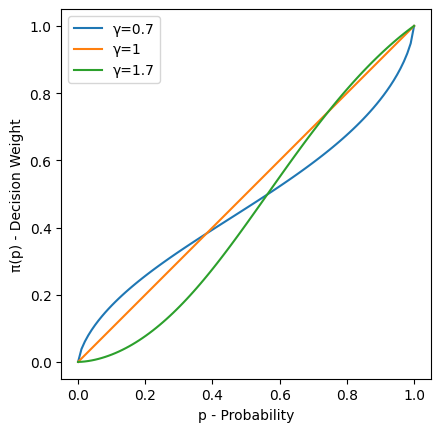

In [141]:
plot_pw_curve(gamma=0.7), plot_pw_curve(gamma=1), plot_pw_curve(gamma=1.7)
plt.axis('square'); plt.legend();

Finally, notice in the final plot below that values of $\gamma$ that are closer to 0 have a more exaggerated S-shape.

Thus, $\gamma$ ranges from 1, where probabilities are perceived perfectly correctly, to a number approaching 0, where probabilities are highly psychologically exaggerated.

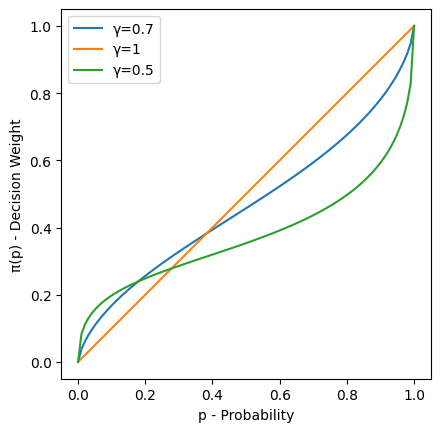

In [142]:
plot_pw_curve(gamma=0.7), plot_pw_curve(gamma=1), plot_pw_curve(gamma=0.5)
plt.axis('square'); plt.legend();

We can incorporate the weighting function into our computation of the value of a gamble as:

$$V(A) = \sum_{x_i\in A} u(x_i) \pi(p_i).$$

A decision model based on this value computation, proposed by Kahneman and Tversky, is referred to as **prospect theory**.

Let's see what happens when we apply prospect theory to the choice we want to explain. Recall that previously, neither models based on expected value or expected utility alone could explain why people choose gamble A from:

| Gamble A | Gamble B |
|-|-|
| <span style="color:white">0</span><span style="color:blue">1%</span> chance of <span style="color:green">\$500</span> <br> <span style="color:blue">99%</span> chance of <span style="color:green">\$0</span> | <span style="color:blue">100%</span> chance of <span style="color:green">\$5</span> |

**Exercise:** Compute $V(A)$ using $\gamma = 0.7$ and $\alpha = 0.8$ for both gambles and store the result in variables `PT_A` and `PT_B`.

In [143]:
# Your code here
PT_A = np.sum(power_utility(A3_outcomes, 0.8) * pi(A3_probs, 0.7))
PT_B = np.sum(power_utility(B3_outcomes, 0.8) * pi(B3_probs, 0.7))


# do not change
print("Prospect theory value of A:", PT_A)
print("Prospect theory value of B:", PT_B)

Prospect theory value of A: 5.4846979569743713597
Prospect theory value of B: 3.6238983183884778683


In [144]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(PT_A, 5.484697956974371) and np.isclose(PT_B, 3.623898318388478):
    print('Test passed')
else:
    print('Test failed')

Test passed


Importantly, the value of gamble A is now higher than the value of gamble B.

This means that prospect theory makes the correct prediction of peoples' behavior!

### Types of model comparison

All of the comparisons we've made between decision models so far have been examples of **qualitative** model comparisons because they identify categorical distinctions between models, such as when only one is capable of producing a preference that is a choice anomaly.

However, decision making experiments tell us about more than just overall preference. They also tell us the proportion of participants choosing A over B, which tells us exactly how valuable A is relative to B. That is, a gamble chosen 100% of the time likely has a much higher psychological value than one chosen 51% of the time. Thus, models with valuations of gambles that better predict these proportions are preferred, and the process their specific numeric predictions is called **quantitative** model comparison.

Let's look at some choice data where quantitative comparison would be helpful:

| Gamble A | Gamble B |
|-|-|
| <span style="color:blue">50%</span> chance of <span style="color:green">-\$100</span> <br> <span style="color:blue">50%</span> chance of <span style="color:green">\$100</span> | <span style="color:blue">100%</span> chance of <span style="color:green">\$0</span> |
|22% picked A|78% picked B|

We already knew that "most" people prefer B, but now we know by exactly how much.

In order to predict proportions using our decison models, we need a way to link the values of the gambles to a probability of choosing them. We can do this in a way that is almost identical to what we did for categorization models, using what is called the **Luce choice rule**. In particular, we define:

$$\text{behavior (choose A with certain probability)} = \text{decide}(A, B) = \frac{e^{V(A)}}{e^{V(A)} + e^{V(B)}}.$$

Note that when $V(A) = V(B)$, the probability of choosing A is 0.5. The probability of choosing A increases as $V(A)$ becomes increasingly larger than $V(B)$, and decreases as $V(A)$ becomes increasingly smaller than $V(B).

Just like we did using the specificity parameter of our categorization models, we can look for values of model parameters (e.g., $\alpha$, $\lambda$, $\gamma$) that provide better fit (e.g., lower MSE) to empirical proportions (22% picked A).

Ultimately, the goal of decision modeling is to thus to find a model and associated parameter settings that best explain the largest number empirical human choices, both qualitatively and quantitatively.

**References:**

Kahneman, D., & Tversky, A. (1979). Prospect theory: An analysis of decision under risk. Econometrica, 47(2), 263-291.